In [51]:
import pandas as pd
import numpy as np
url = (
     "https://archive.ics.uci.edu/ml/machine-learning-databases"
     "/abalone/abalone.data"
 )
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
X = abalone.drop('Rings', axis=1)
y = abalone['Rings']
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42
    )

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  
0           0.1500

In [54]:
def knn(X_train, y_train, k):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    return accuracy, knn


def test(model, X_test, y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

results_accuracy=np.zeros(10)
for k in range(1,11):
    results_accuracy[k-1], knn=knn(X_train, y_train,k)

print(results_accuracy)

[1.         0.59323556 0.5169111  0.47770129 0.44926669 0.42592038
 0.40616582 0.38820712 0.38072433 0.36755462]


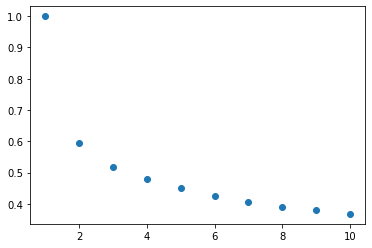

In [56]:

import seaborn as sns
f, ax = plt.subplots()
Xs=[1,2,3,4,5,6,7,8,9,10]
points = ax.scatter(
     Xs, results_accuracy
)
plt.show()